About the Data
Dataset contain the sales data of different products in India.This data has been taken from the Kaggle dataset. Dataset contain informations regarding the age, state, product, occupation, marital_status, amount of purchase, product_id, customer name and Number of orders per userId.

This analysis will be a exploratory data analysis and we will try to figure out some important insights from the data in order to make a data driven decision.


### Important questions to analyze

1. How can marketing teams leverage Diwali sales data to enhance sales strategies?

2. Which age groups exhibit the strongest affinity for Diwali shopping?

3. Does marital status play a significant role in Diwali purchasing decisions?

4. Which Indian states present the most favorable advertising opportunities for company X to maximize Diwali sales?

5. What product categories are most sought after by consumers during Diwali?

### Data crediblity and integrity
Dataset contain 11,251 rows and 15 columns. This is a big data but we can not generalize the concept for whole population but will try to figure out some strong insights that could help the users of this report to increase their sales.

### Import required libraries
We will be using following libraries in order to clean and analyze the data.
* Pandas
* Numpy
* Matplotlib
* Seaborn

In [2]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [3]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [8]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# drop null values
df.dropna(inplace=True)

In [10]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [11]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

In [12]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [13]:
df.shape

(11239, 13)

In [14]:
df = df.drop_duplicates()

In [16]:
df.shape

(11231, 13)

# Exploratory Data Analysis


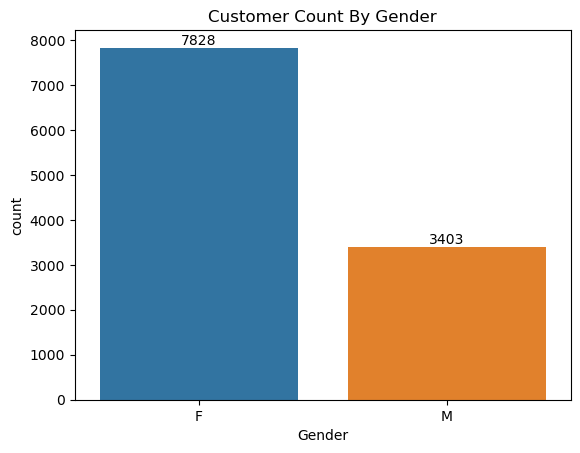

In [17]:
# plot the count of customers on basis of their gender
gender_count = sns.countplot(x = 'Gender', data = df)
plt.title("Customer Count By Gender")
# we can add lables to this chart

for bars in gender_count.containers:
    gender_count.bar_label(bars)

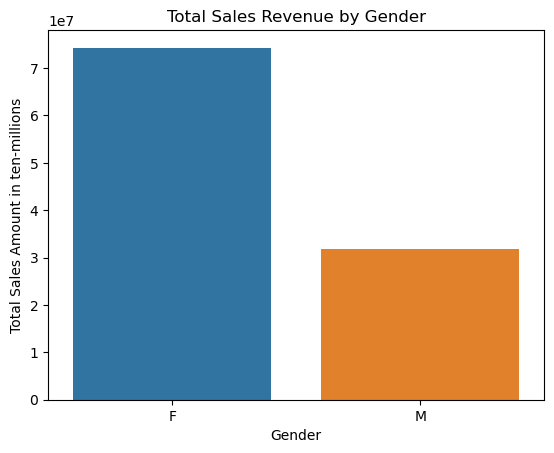

In [18]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)
plt.title('Total Sales Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount in ten-millions')
plt.show()

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

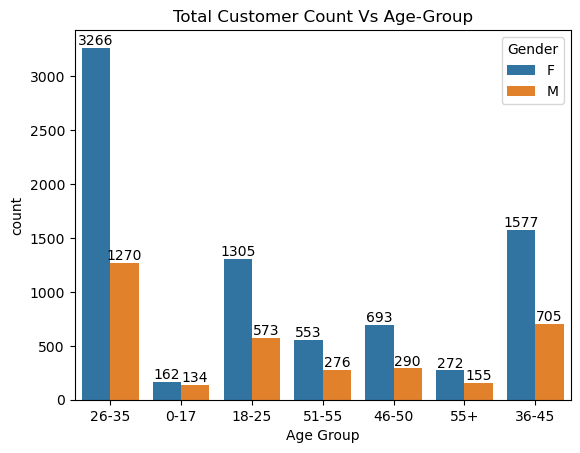

In [21]:
# Total count of customers in each age-group data 
age_group_count = sns.countplot(x = 'Age Group', data = df, hue='Gender')
plt.title("Total Customer Count Vs Age-Group")

for bars in age_group_count.containers:
    age_group_count.bar_label(bars)

Text(0.5, 1.0, 'Total Revenue Generated by each Age-Group')

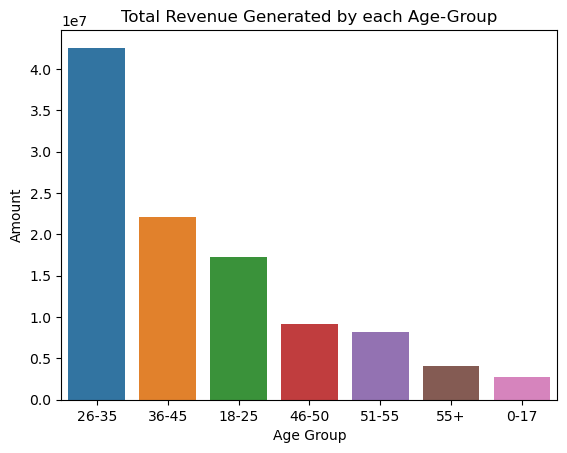

In [22]:
# group the data usinng Age Group and calculate the total amount generated by each age group
total_revenue_age = df.groupby(['Age Group'], as_index =False).sum('Amount').sort_values(by='Amount', ascending = False)

# plot the data

sns.barplot(x = 'Age Group', y = 'Amount', data = total_revenue_age)
plt.title("Total Revenue Generated by each Age-Group")

In [23]:
# group the data on basis of age group so that we could later use this dataframe

grouped_df = df.groupby("Age Group")

In [24]:
sum_of_revenue = grouped_df["Amount"].sum()

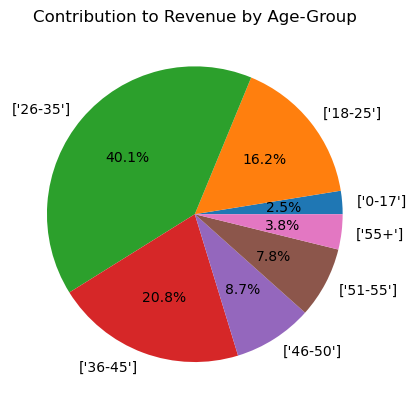

In [25]:
plt.pie(sum_of_revenue, labels = grouped_df["Age Group"].unique(), autopct="%1.1f%%")
plt.title("Contribution to Revenue by Age-Group")
plt.show()

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs and are females*

In [26]:
grouped_state = df.groupby("State").sum("Amount")
print(grouped_state)

                     User_ID    Age  Marital_Status  Orders    Amount
State                                                                
Andhra Pradesh     813444768  28862             340    2051   8037146
Bihar              434276128  15388             189    1058   4014669
Delhi             1107443106  39245             471    2740  11603818
Gujarat            427277619  15446             158    1063   3938159
Haryana            452368496  15830             184    1106   4217871
Himachal Pradesh   609750920  21618             256    1568   4963368
Jharkhand          381174335  13564             159     953   3026456
Karnataka         1307886059  46006             562    3240  13523540
Kerala             454335141  15625             198    1137   3894491
Madhya Pradesh     923841712  32991             397    2252   8101142
Maharashtra       1526613269  52624             630    3798  14404467
Punjab             200583317   6906              84     495   1525800
Rajasthan          2

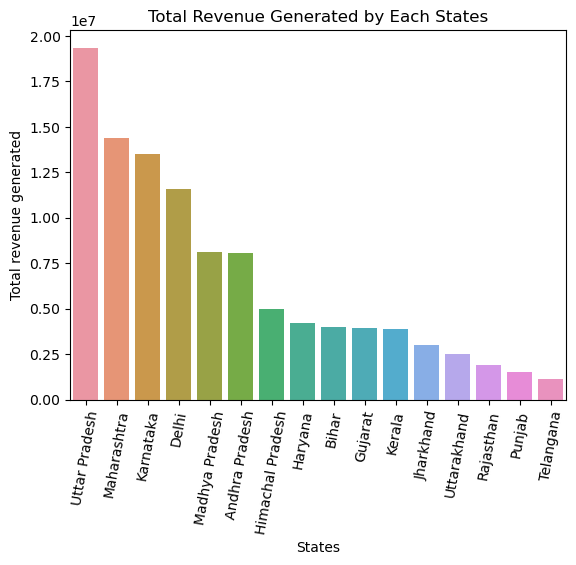

In [27]:
total_revenue_state = df.groupby(['State'], as_index =False).sum('Amount').sort_values(by='Amount', ascending = False)

# plot the data

states_plot = sns.barplot(x = 'State', y = 'Amount', data = total_revenue_state)
plt.title("Total Revenue Generated by Each States")
plt.ylabel("Total revenue generated")
plt.xlabel("States")
plt.xticks(rotation = 80)
plt.rcParams["figure.figsize"] = (35,6)

__Insights From States__
We can observe the top 5 states in India with highest sales are Uttar Pradesh, Maharashtra, Karnataka, Delhi and Madhya Pradesh.

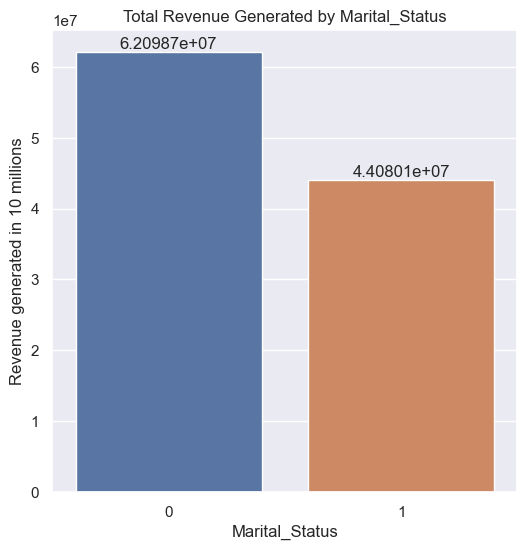

In [28]:
# plotting a bar graph for different marital status and see if there is any trend in the data for the married and unmarried 

status = df.groupby(['Marital_Status'],as_index = False).sum("Amount").sort_values(by= "Amount", ascending = False)

# plot the data
sns.set(rc={'figure.figsize':(6,6)})
status_plot = sns.barplot(x= 'Marital_Status', y = 'Amount', data = status)
plt.title("Total Revenue Generated by Marital_Status")
plt.ylabel("Revenue generated in 10 millions")

for bars in status_plot.containers:
    status_plot.bar_label(bars)

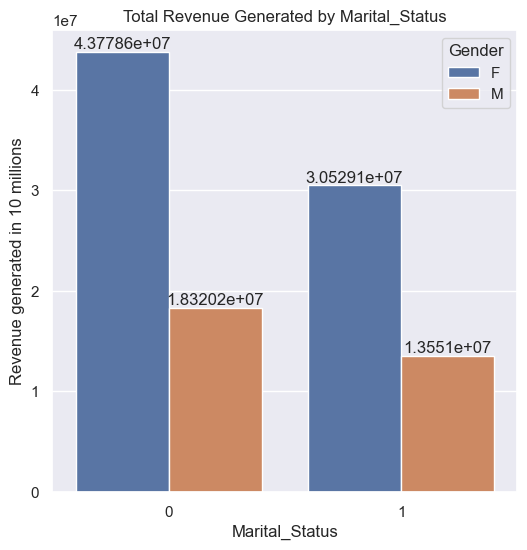

In [29]:
status = df.groupby(['Marital_Status', 'Gender'],as_index = False).sum("Amount").sort_values(by= "Amount", ascending = False)

# plot the data
sns.set(rc={'figure.figsize':(6,6)})
status_plot = sns.barplot(x= 'Marital_Status', y = 'Amount', data = status, hue ='Gender')
plt.title("Total Revenue Generated by Marital_Status")
plt.ylabel("Revenue generated in 10 millions")

for bars in status_plot.containers:
    status_plot.bar_label(bars)

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

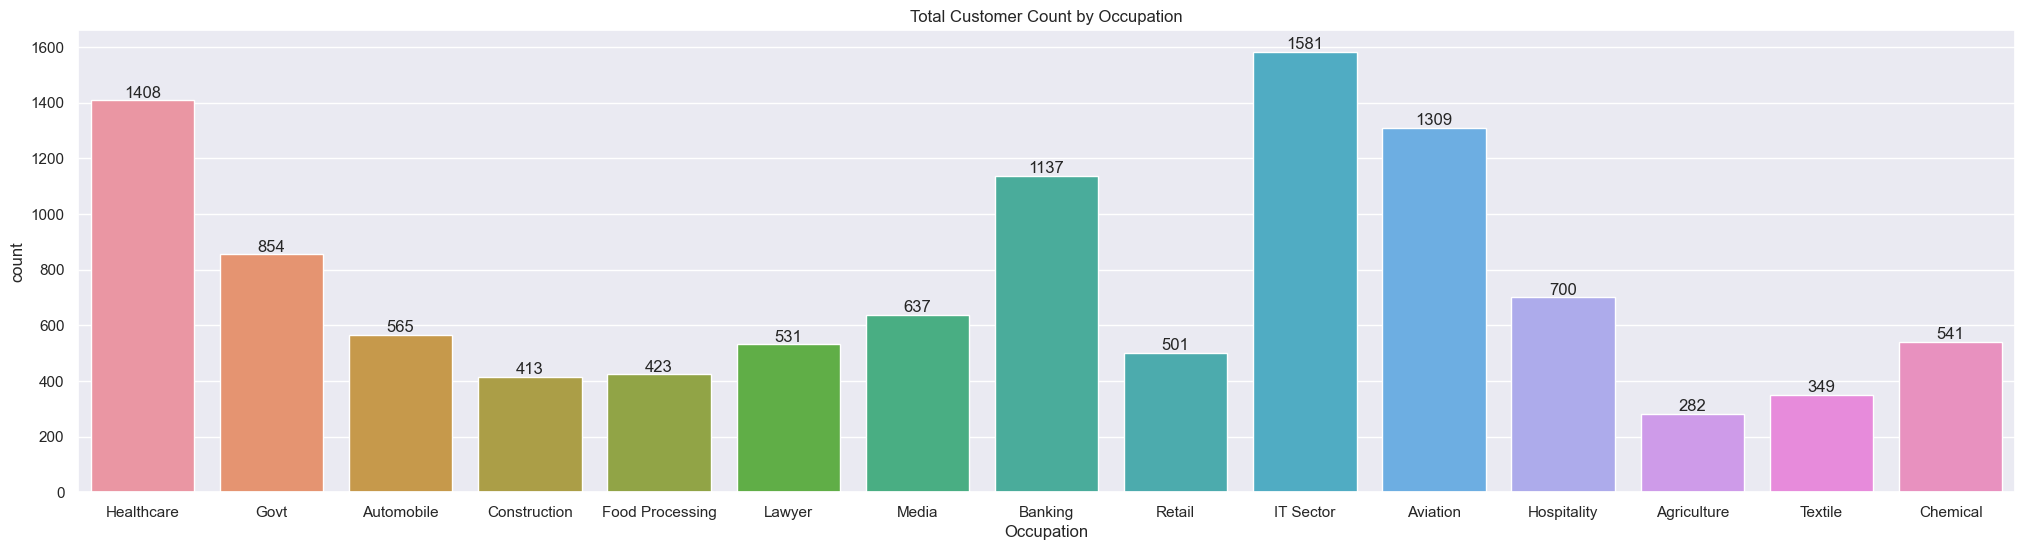

In [30]:
occupation = df.groupby(['Occupation'], as_index = False).sum("Amount").sort_values(by = 'Amount', ascending = False)

# plot the data on a bar graph
sns.set(rc={'figure.figsize':(25,6)})
occupation_plot = sns.countplot(data = df, x = 'Occupation')
plt.title("Total Customer Count by Occupation")

for bars in occupation_plot.containers:
    occupation_plot.bar_label(bars)

Text(0.5, 1.0, 'Top 5 Revenue Generated  Vs Occupation of customers')

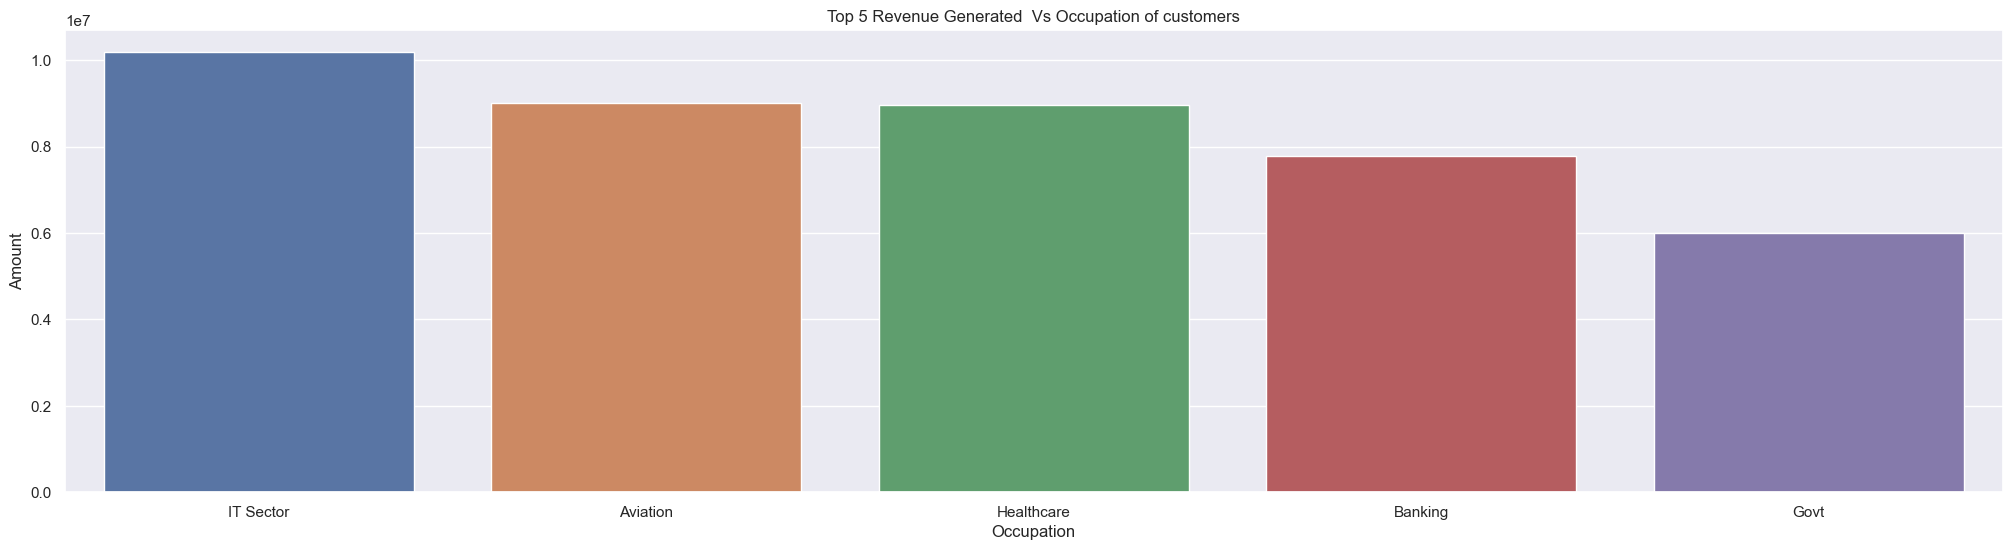

In [31]:
occupation_data = df.groupby(['Occupation', 'Gender'], as_index = False).sum("Amount").sort_values(by= 'Amount', ascending = False).head(5)

# plot the data

status_plot = sns.barplot(x= 'Occupation', y = 'Amount', data = occupation_data)
plt.title("Top 5 Revenue Generated  Vs Occupation of customers")


__Insights from Occupation__

We observe the graph that the IT Sector generates the highest sales revenue followed by Aviation, Healthcare then Banking.

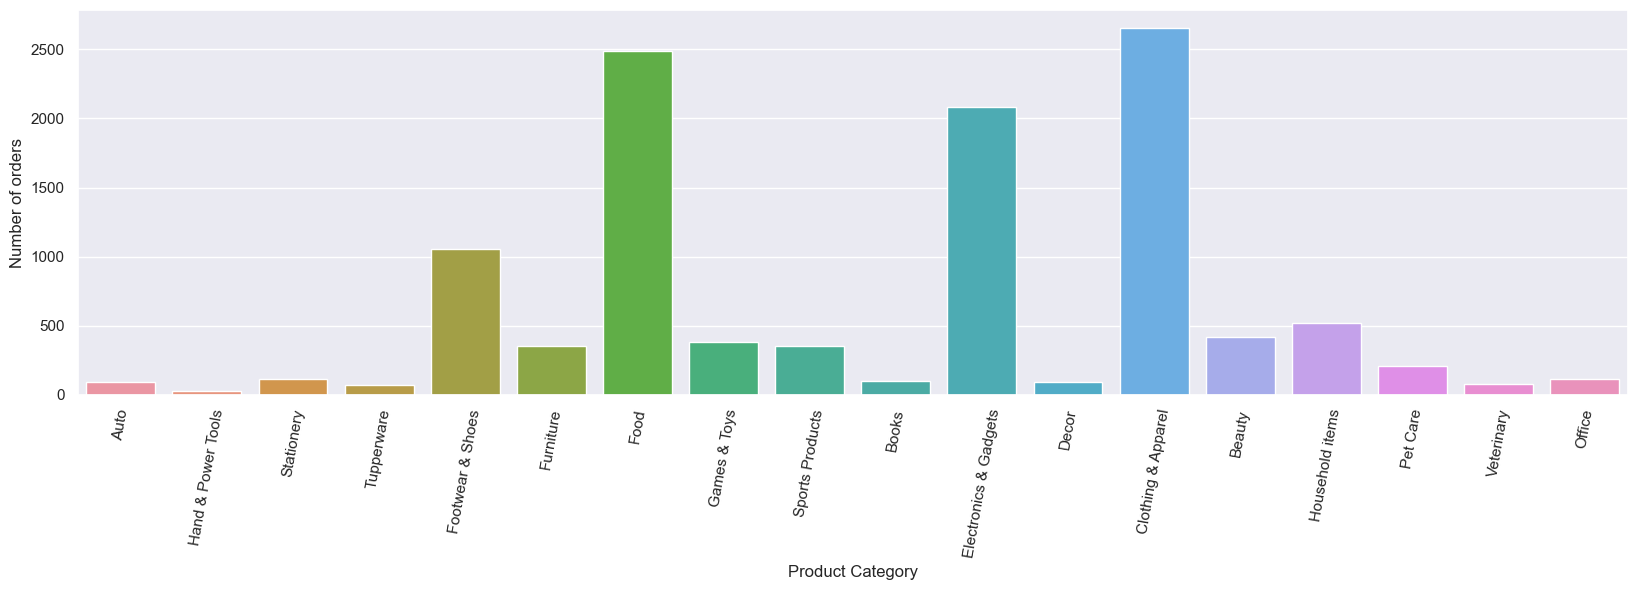

In [33]:
sns.set(rc={'figure.figsize': (20,5)})
sns.countplot(x = 'Product_Category', data = df)
plt.xlabel("Product Category")
plt.ylabel("Number of orders")
plt.xticks(rotation=80)
plt.show()

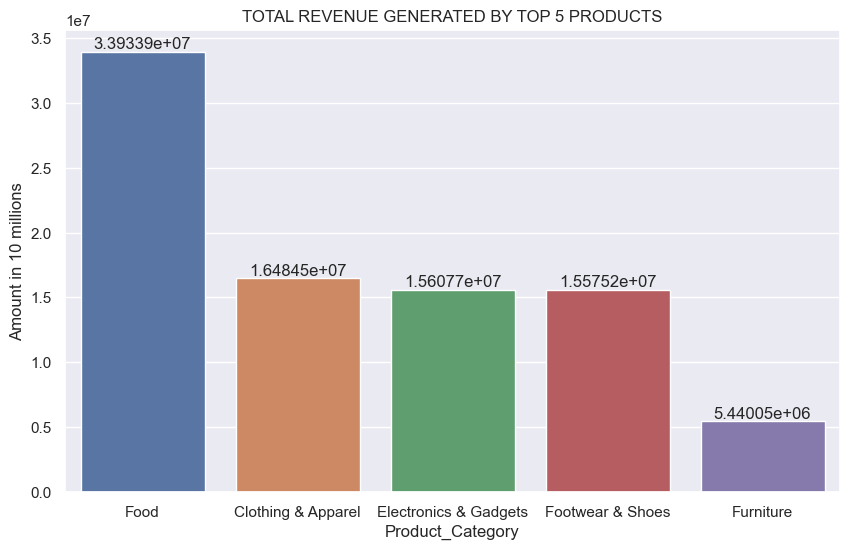

In [34]:
product = df.groupby(['Product_Category'], as_index=False).sum('Amount').sort_values(by = 'Amount', ascending = False).head(5)

#plot the data
sns.set(rc={'figure.figsize':(10,6)})
product_plot = sns.barplot(x = 'Product_Category', y = 'Amount', data = product)
plt.title("TOTAL REVENUE GENERATED BY TOP 5 PRODUCTS")
plt.ylabel("Amount in 10 millions")

for bars in product_plot.containers:
    product_plot.bar_label(bars)

__Insights from product category__

We can see from the graph that Food is the highest contributor in revenue generation.

# Important Insights

* Females are participating and are more interested in diwali sales than men. Also the purchasing power of female is higher than male as the total sales revenue generated from female is much higher than that of male.

* Most of the customers fall in age group of 26-35. Customers from age group of 26-35 are generating the more than 40% of total Revenue.

* Age group of 30 and around 30 are purchasing more than the rest of consumers. Old age people are least active buyers.

* Top 5 states of India with highest sales are Uttar Pradesh, Maharashtra, Karnataka, Delhi and Madhya Pradesh.

* IT Sector generates the highest sales revenue and after that Aviation, Healthcare and then Banking.

* In the case of revenue generation revenue generation Food is the highest contributor.


## Conclusion:

### *Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*